# 1. Contents<a id='1._Contents' ></a>
* [2. Introduction](#2._Introduction)
  * [2a. Dataset](#2a._Dataset)
  * [2b. Audience](#2b._Audience)
* [3. Sourcing and Loading](#3._Sourcing_and_Loading)
  * [3a. Import relevant libraries](#3a._Import_relevant_libraries)
  * [3b. Load DataFrame](#3b._Load_DataFrame)
  * [3c. Preliminary data exploration](#3c._Preliminary_data_exploration)
* [4. Data Wrangling](#4._Data_Wrangling)
  * [4a. Drop `Top Ten`](#4a._Drop_`Top`_`Ten`)
* [5. Exploratory Data Analysis](#5._Exploratory_Data_Analysis)
  * [5a. `Stars` boxplot](#5a._`Stars`_boxplot)
  * [5b. `Stars` summmary statistics](#5b._`Stars`_summary_statistics)
  * [5c. Histograms of `Stars`](#5c._Histograms_of_`Stars`)
  * [5d. Prepare subsets for t-test](#5d._Prepare_subsets_for_t-test)
  * [5e. Paired t-test](#5e._Paired_t-test)
  * [5f. Paired t-interval test](#5f._Paired_t-interval_test)
* [6. Conclusion](#6._Conclusion)

# 2. Introduction<a id='2._Introduction' ></a>

**2a. Dataset** <a id='2a._Dataset' ></a>

The Ramen Rater is a product review website for the hardcore packaged ramen enthusiast (or "ramenphile"), with over 2500 reviews to date. While ramen originated from Japan, many manufacturers from a variety of countries have thrown their hat in the ring. This case study will explore the ratings on The Ramen Rater website to see if there is a significant difference between the score of the average packaged ramen from Japan vs. the rest of the world. 

**2b. Audience** <a id='2b._Audience' ></a>

The audience for this case study will be a non-technical audience. 

# 3. Sourcing and Loading<a id='3._Sourcing_and_Loading' ></a>

**3a. Import relevant libraries**<a id='3a._Import_relevant_libraries' ></a>

In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import kaggle as kg
import pandas as pd
import missingno as msno
import statsmodels.api as sm
import scipy.stats
from matplotlib.lines import Line2D
from kaggle.api.kaggle_api_extended import KaggleApi
from statsmodels.graphics.api import abline_plot
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn import linear_model, preprocessing
from zipfile import ZipFile
from scipy import stats
from scipy.stats import t
from scipy.stats import ttest_ind
from scipy.stats import mannwhitneyu
from numpy.random import seed
import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)
warnings.filterwarnings(action="ignore", module="scipy", message="^internal gelsd")

**3b. Load DataFrame**<a id='3b._Load_DataFrame' ></a>

In [4]:
ramen = pd.read_csv('ramen.csv')

**3c. Preliminary data exploration**<a id='3c._Preliminary_data_exploration' ></a>

In [5]:
ramen.head()

,Review #,Brand,Variety,Style,Country,Stars,Top Ten
0,2580,New Touch,T's Restaurant Tantanmen,Cup,Japan,3.75,NaN
1,2579,Just Way,Noodles Spicy Hot Sesame Spicy Hot Sesame Guan...,Pack,Taiwan,1,NaN
2,2578,Nissin,Cup Noodles Chicken Vegetable,Cup,USA,2.25,NaN
3,2577,Wei Lih,GGE Ramen Snack Tomato Flavor,Pack,Taiwan,2.75,NaN
4,2576,Ching's Secret,Singapore Curry,Pack,India,3.75,NaN


In [6]:
ramen.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2580 entries, 0 to 2579
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Review #  2580 non-null   int64 
 1   Brand     2580 non-null   object
 2   Variety   2580 non-null   object
 3   Style     2578 non-null   object
 4   Country   2580 non-null   object
 5   Stars     2580 non-null   object
 6   Top Ten   41 non-null     object
dtypes: int64(1), object(6)
memory usage: 141.2+ KB


In [7]:
ramen.describe()

,Review #
count,2580.000000
mean,1290.500000
std,744.926171
min,1.000000
25%,645.750000
50%,1290.500000
75%,1935.250000
max,2580.000000


# 4. Data Wrangling<a id='4._Data_Wrangling' ></a>

**4a. Drop `Top Ten`**<a id='4a._Drop_`Top`_`Ten`' ></a>

Since the `Top Ten` column is almost completely full of Null values, I will remove it.

In [15]:
ramen.drop(['Top Ten'], axis=1, inplace=True)
ramen.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2580 entries, 0 to 2579
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Review #  2580 non-null   int64 
 1   Brand     2580 non-null   object
 2   Variety   2580 non-null   object
 3   Style     2578 non-null   object
 4   Country   2580 non-null   object
 5   Stars     2580 non-null   object
dtypes: int64(1), object(5)
memory usage: 121.1+ KB


**4b. Convert `Stars` to type int** <a id='4b._Convert_`Stars`_to_type_int ></a>

In [23]:
ramen.Stars.value_counts(dropna=False)

4          384
5          369
3.75       350
3.5        326
3          173
3.25       170
4.25       143
4.5        132
2.75        85
2           68
2.5         67
4.75        64
1.5         37
1.75        27
1           26
0           26
2.25        21
0.5         14
0.25        11
5.0         10
1.25        10
3.50         9
5.00         7
4.00         6
4.3          4
Unrated      3
4.0          3
3.8          3
4.50         3
2.3          2
4.125        2
3.1          2
2.9          2
1.1          2
3.0          2
2.8          2
3.125        1
0.75         1
2.85         1
0.1          1
2.1          1
3.7          1
3.4          1
2.125        1
3.65         1
3.3          1
3.00         1
3.6          1
3.2          1
1.8          1
0.9          1
Name: Stars, dtype: int64

In [25]:
ramen['Stars'].replace('Unrated', np.NaN, inplace=True)
ramen['Stars'].value_counts(dropna=False)

4        384
5        369
3.75     350
3.5      326
3        173
3.25     170
4.25     143
4.5      132
2.75      85
2         68
2.5       67
4.75      64
1.5       37
1.75      27
1         26
0         26
2.25      21
0.5       14
0.25      11
5.0       10
1.25      10
3.50       9
5.00       7
4.00       6
4.3        4
NaN        3
4.0        3
4.50       3
3.8        3
3.1        2
2.3        2
2.8        2
4.125      2
3.0        2
1.1        2
2.9        2
3.7        1
3.6        1
0.75       1
2.85       1
3.65       1
3.00       1
2.1        1
2.125      1
3.2        1
0.1        1
3.4        1
3.3        1
3.125      1
1.8        1
0.9        1
Name: Stars, dtype: int64

In [28]:
ramen['Stars'] = ramen['Stars'].astype('float')
ramen.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2580 entries, 0 to 2579
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Review #  2580 non-null   int64  
 1   Brand     2580 non-null   object 
 2   Variety   2580 non-null   object 
 3   Style     2578 non-null   object 
 4   Country   2580 non-null   object 
 5   Stars     2577 non-null   float64
dtypes: float64(1), int64(1), object(4)
memory usage: 121.1+ KB


# 5. Exploratory Data Analysis <a id='5._Exploratory_Data_Analysis' ></a>

**5a. `Stars` boxplot** <a id='5a._`Stars`_boxplot' ></a>

In [37]:
ramen['Japan'] = [True if country == 'Japan' else False for country in ramen['Country']]
ramen.head()

,Review #,Brand,Variety,Style,Country,Stars,Japan
0,2580,New Touch,T's Restaurant Tantanmen,Cup,Japan,3.75,True
1,2579,Just Way,Noodles Spicy Hot Sesame Spicy Hot Sesame Guan...,Pack,Taiwan,1.00,False
2,2578,Nissin,Cup Noodles Chicken Vegetable,Cup,USA,2.25,False
3,2577,Wei Lih,GGE Ramen Snack Tomato Flavor,Pack,Taiwan,2.75,False
4,2576,Ching's Secret,Singapore Curry,Pack,India,3.75,False


[Text(0.5, 0, 'Country')]

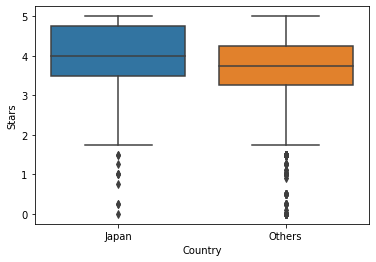

In [58]:
_ = sns.boxplot(y='Stars', x='Japan', data=ramen, order=[True,False])
_.set_xticklabels(['Japan', 'Others'])
_.set(xlabel='Country')

We can see from these boxplots that Japan has a higher mean score than the rest of the world.

**5b. `Stars` summary statistics** <a id='5b._`Stars`_summary_statistics' ></a>

In [80]:
ramen.groupby('Japan').describe()['Stars']

,count,mean,std,min,25%,50%,75%,max
Japan,,,,,,,,
False,2225.0,3.602955,1.021123,0.0,3.25,3.75,4.25,5.0
True,352.0,3.981605,0.913755,0.0,3.50,4.00,4.75,5.0


The summary statistics provide further support for the boxplot. However, whether this difference is significant has yet to be investigated.

**5c. Histograms of `Stars`** <a id='5c._Histograms_of_`Stars`' ></a>

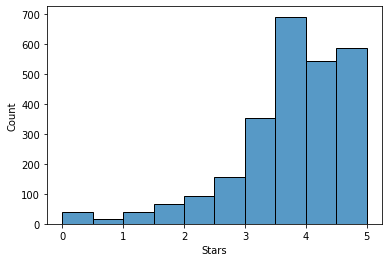

In [83]:
sns.histplot(x='Stars', data=ramen, bins=10)

**5d. Prepare subsets for t-test** <a id='5d._Prepare_subsets_for_t-test' ></a>

In [84]:
japan = ramen[ramen['Country'] == 'Japan']
japan.head()

,Review #,Brand,Variety,Style,Country,Stars,Japan
0,2580,New Touch,T's Restaurant Tantanmen,Cup,Japan,3.75,True
6,2574,Acecook,Spice Deli Tantan Men With Cilantro,Cup,Japan,4.00,True
7,2573,Ikeda Shoku,Nabeyaki Kitsune Udon,Tray,Japan,3.75,True
8,2572,Ripe'n'Dry,Hokkaido Soy Sauce Ramen,Pack,Japan,0.25,True
13,2567,Nissin,Deka Buto Kimchi Pork Flavor,Bowl,Japan,4.50,True


In [85]:
others = ramen[ramen['Country'] != 'Japan']
others.head()

,Review #,Brand,Variety,Style,Country,Stars,Japan
1,2579,Just Way,Noodles Spicy Hot Sesame Spicy Hot Sesame Guan...,Pack,Taiwan,1.00,False
2,2578,Nissin,Cup Noodles Chicken Vegetable,Cup,USA,2.25,False
3,2577,Wei Lih,GGE Ramen Snack Tomato Flavor,Pack,Taiwan,2.75,False
4,2576,Ching's Secret,Singapore Curry,Pack,India,3.75,False
5,2575,Samyang Foods,Kimchi song Song Ramen,Pack,South Korea,4.75,False


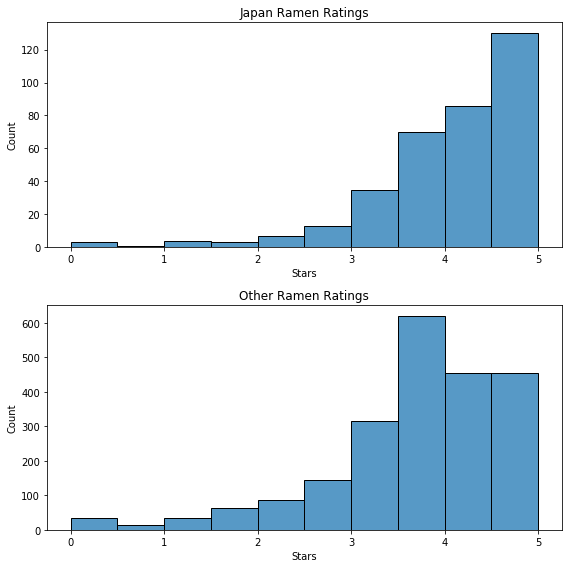

In [126]:
fig = plt.figure(figsize=(8,8))

_ = plt.subplot(2,1,1)
_ = sns.histplot(x='Stars', data=japan, bins=10).set_title('Japan Ramen Ratings')

_ = plt.subplot(2,1,2)
_ = sns.histplot(x='Stars', data=others, bins=10).set_title('Other Ramen Ratings')
_ = plt.tight_layout()

**5e. Paired t-test** <a id='5e._Paired_t-test' ></a>

I will now conduct a paired t-test, with the null hypothesis that packaged ramen from Japan is scored the same as packaged ramen from other countries on The Ramen Rater.

In [130]:
others = others[~others['Stars'].isnull()]
others['Stars'].isnull().sum()

0

In [131]:
ttest_ind(japan['Stars'], others['Stars'], equal_var=False)

Ttest_indResult(statistic=7.10444725281942, pvalue=4.1786889930473414e-12)

With such a small pvalue, we have enough evidence to reject the null hypothesis that packaged ramen from Japan and the rest of the world have the same average score on The Ramen Rater.

**5f. Paired t-interval test** <a id='5f._Paired_t-interval_test' ></a>

Bootstrapped mean for Japanese packaged ramen: 3.98
Bootstrapped mean for non-Japanese packaged ramen: 3.6


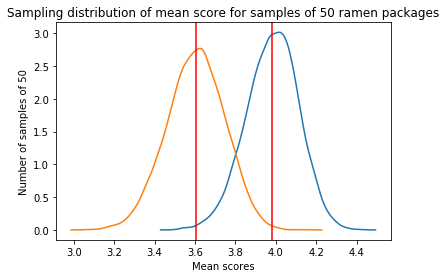

In [161]:
def sampler(df, n):
    return np.random.choice(df.Stars, n)

japan_dist = [np.mean(sampler(japan,50)) for i in range(10000)]
others_dist = [np.mean(sampler(others,50)) for i in range(10000)]

_ = sns.kdeplot(japan_dist)
_ = sns.kdeplot(others_dist)
_ = plt.axvline(np.mean(japan_dist), color='r')
_ = plt.axvline(np.mean(others_dist), color='r')
_ = plt.xlabel('Mean scores')
_ = plt.ylabel('Number of samples of 50')
_ = plt.title('Sampling distribution of mean score for samples of 50 ramen packages')

print('Bootstrapped mean for Japanese packaged ramen: ' + str(round(np.mean(japan_dist), 2)))
print('Bootstrapped mean for non-Japanese packaged ramen: ' + str(round(np.mean(others_dist), 2)))

We can see from a KDE plot of bootstrapped scores from both categories of packaged ramen that the means are quite different. Whether their confidence intervals overlap is yet to be seen.

In [182]:
japan_mean = np.mean(japan_dist)
japan_std = np.std(japan_dist, ddof=49)
print('95% Confidence interval for mean sccore of Japanese packaged ramen: ' + 
      str(round(t.ppf(.025, 9999, loc=japan_mean, scale=japan_std), 2)) + ', ' +
      str(round(t.ppf(.975, 9999, loc=japan_mean, scale=japan_std), 2)))

others_mean = np.mean(others_dist)
others_std = np.std(others_dist, ddof=49)
print('95% Confidence interval for mean score of non-Japanese packaged ramen: ' +
     str(round(t.ppf(.025, 9999, loc=others_mean, scale=others_std), 2)) + ', ' +
     str(round(t.ppf(.975, 9999, loc=others_mean, scale=others_std), 2)))

95% Confidence interval for mean sccore of Japanese packaged ramen: 3.73, 4.24
95% Confidence interval for mean score of non-Japanese packaged ramen: 3.32, 3.88


It looks like there is a little bit of overlap in the 2 confidence intervals. As such, we no longer have indisputable evidence to reject the null hypothesis.

# 6. Conclusion <a id='6._Conclusion' ></a>

At first glance, the mean of ratings between Japanese and non-Japanese packaged ramen did not seem that different. After conducting a t-test, it seemed like there was enough evidence to reject the null hypothesis that these means are the same. However, after conducing a paired confidence interval test, we obtained evidence in support of the null hypothesis. As such, we conclude that there is not sufficient evidence that the mean score Japanese packaged ramen is any different than the mean score of other countries' packaged ramen.